## To match left and right SWR

In [1]:
from scipy import signal
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.widgets import Slider, Button, Cursor
from scipy import fftpack
import pandas as pd
from pathlib import Path

%matplotlib widget

folder_base = Path('/Users/ahay/Documents/DATA/DREADDthalamus/20230223/2204/')

filenamel = folder_base / f'Spindleproperties_PFCl.csv' #
filenamer = folder_base / f'Spindleproperties_PFCr.csv' #

Eventsl = pd.read_csv(filenamel)
Eventsr = pd.read_csv(filenamer)


In [2]:
numptsl = len(Eventsl)
numptsr = len(Eventsr)
EventsrP = Eventsr["peak time"]
EventslP = Eventsl["peak time"]

matdist = np.empty((numptsl, numptsr), dtype=float)
for i in range(numptsl):
    for j in range(numptsr):
        matdist[i,j] = abs(EventslP[i]- EventsrP[j])

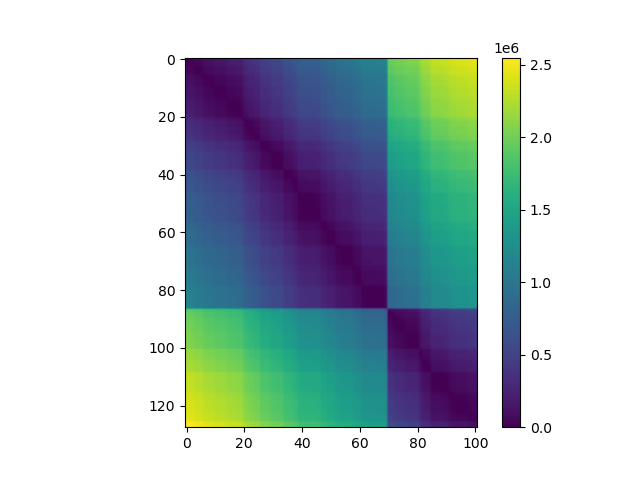

In [3]:
plt.close()
im = plt.imshow(matdist)
plt.colorbar(im)
plt.show()

In [4]:
mindistl = EventslP.copy()
for i in range(numptsl):
    mindistl[i] = min(matdist[i,:])

mindistr = EventsrP.copy()
for i in range(numptsr):
    mindistr[i] = min(matdist[i,:])

In [7]:
OverlapR = len([e for e, elem in enumerate(mindistr) if elem < 1000])
PerOverlapR = OverlapR/len(mindistr)
OverlapL = len([e for e, elem in enumerate(mindistl) if elem < 1000])
PerOverlapL = OverlapL/len(mindistl)
print(PerOverlapL, PerOverlapR)



0.7890625 0.8217821782178217


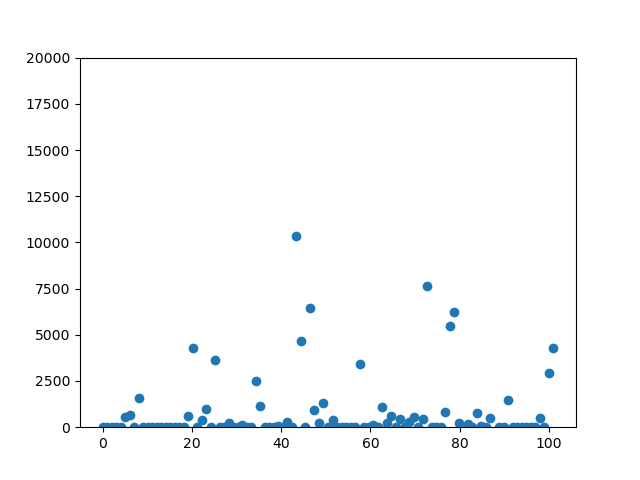

In [8]:
x = np.linspace(0, len(mindistr), num=len(mindistr))
plt.close()
fig, ax = plt.subplots()
ax.plot(x, mindistr, marker='o',linestyle='')
ax.set_ylim(0,20000)
#ax.set_yscale('symlog')
filename = folder_base / f'DistanceRight2205.svg'
#plt.savefig(filename, format="svg")
plt.show()


In [9]:

filename3 = folder_base / f'SignalPFCr.npy'
filename4 = folder_base / f'SignalPFCl.npy'

CA1l = np.load(filename4, mmap_mode= 'r')
CA1r = np.load(filename3, mmap_mode= 'r')


A = np.concatenate((CA1l, CA1r), axis = 1)

# use the choice method of the Generator class
rng = np.random.default_rng()
A_sampled = rng.choice(A, 1000)

Points_CA1l = A_sampled[:,1]
Points_CA1r = A_sampled[:,3]

In [10]:
r = np.corrcoef(Points_CA1l, Points_CA1r)
r

array([[1.        , 0.98064818],
       [0.98064818, 1.        ]])

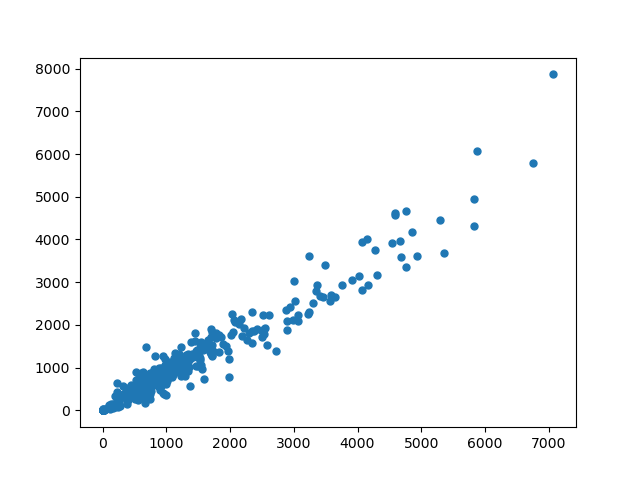

In [11]:
plt.close()
plt.plot(Points_CA1l, Points_CA1r, linestyle = '', marker = 'o', markersize = 5)

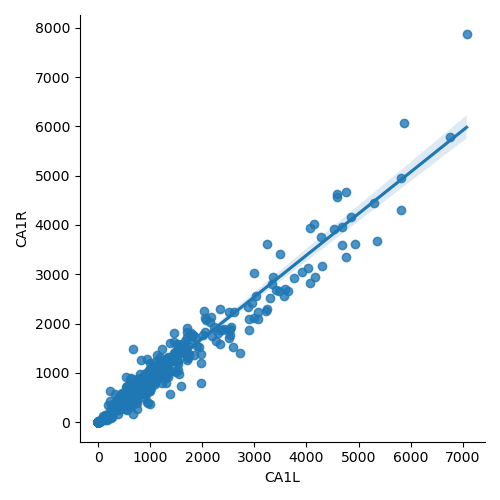

In [12]:
import seaborn as sns
filename = folder_base / f'Correl2205.svg'
A = {"CA1L": Points_CA1l, "CA1R": Points_CA1r}
df = pd.DataFrame(data=A)

sns.scatterplot(x="CA1L", y="CA1R", data=df)
sns.lmplot(x="CA1L", y="CA1R", data=df)
#plt.savefig(filename, format="svg")
plt.show()

In [13]:
from scipy import stats
stats.pearsonr(Points_CA1l, Points_CA1r)

(0.9806481793083446, 0.0)

In [14]:

start = 1606000
end = 1616000

filename3 = folder_base / f'LFPwake0.npy'
filename4 = folder_base / f'SignalPFCl.npy'
filename5 = folder_base / f'SignalPFCr.npy'
WakeRem = np.load(filename3, mmap_mode= 'r')
SubstProjL = np.load(filename4, mmap_mode= 'r')
SubstProjR = np.load(filename5, mmap_mode= 'r')
TraceR = WakeRem[start:end,24]
TraceL = WakeRem[start:end,22]
TraceFiltR = SubstProjR[start:end,0]
TraceFiltL = SubstProjL[start:end,0]
ProjL = SubstProjL[start:end,1]
ProjR = SubstProjR[start:end,1]
EMG = WakeRem[start:end,6]

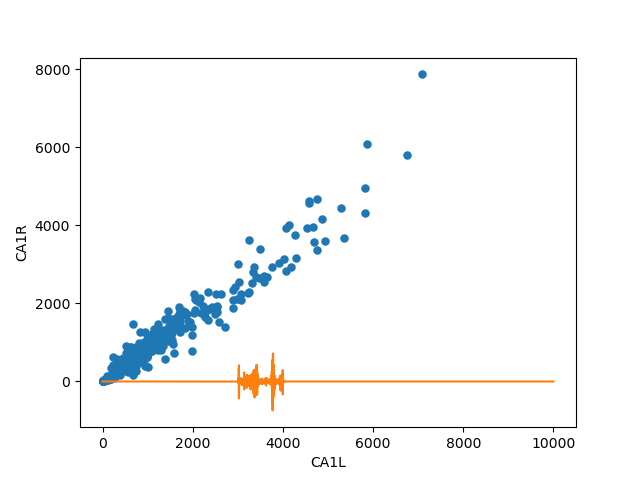

In [15]:
time = np.linspace(0, (end-start), num=(end-start))
# Filter parameter :
f_lowcut = 200.
f_hicut = 400.
N = 4
fs = 1000
nyq = 0.5 * fs
Wn = [f_lowcut/nyq,f_hicut/nyq]  # Nyquist frequency fraction


# Filter creation :
b, a = signal.butter(N, Wn, 'band')
filt_EMG = signal.filtfilt(b, a, EMG)

plt.close()
filename = folder_base / f'EMG2204_2.svg'
plt.plot(time, filt_EMG)
#plt.savefig(filename, format="svg")
plt.show()

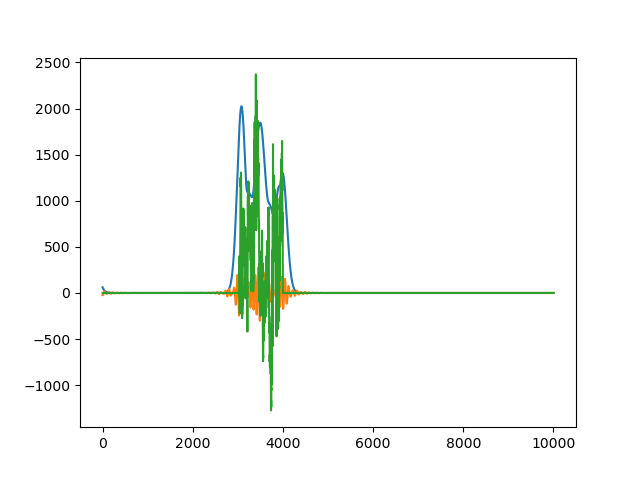

In [16]:
time = np.linspace(0, (end-start), num=(end-start))
plt.close()
filename = folder_base / f'RTraces2205_2.svg'
plt.plot(time, ProjR*1)
plt.plot(time, TraceFiltR)
plt.plot(time, TraceR)
#plt.savefig(filename, format="svg")
plt.show()

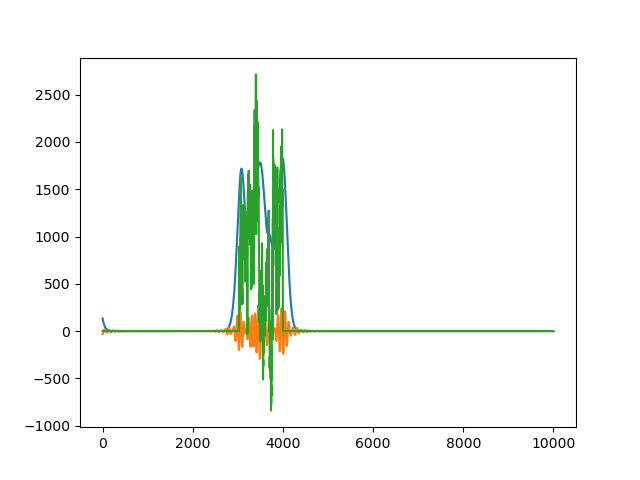

In [17]:
time = np.linspace(0, (end-start), num=(end-start))
plt.close()
filename = folder_base / f'LTraces2205_2.svg'
plt.plot(time, ProjL*1)
plt.plot(time, TraceFiltL)
plt.plot(time, TraceL)
#plt.savefig(filename, format="svg")
plt.show()